# Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


## Modelo Simple (una sola variable)

In [11]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.shape

(353, 1)

In [12]:
y_train.shape

(353, 1)

In [7]:
#diabetes.target

In [13]:

# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

In [14]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 4150.68
r2: 0.19


In [15]:
print('pendiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

pendiente: [[981.65543614]]
intercepto: [152.28824927]


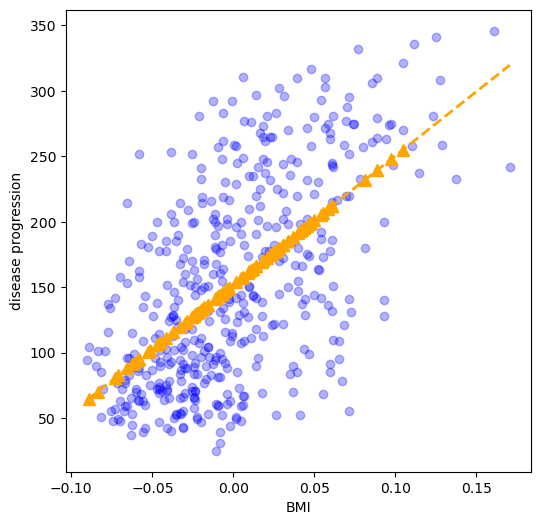

In [16]:

m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

##  Modelo lineal con dos variables 


In [21]:
X = df[['bmi','s2']]
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

modelo_regresion_multiple = LinearRegression()

modelo_regresion_multiple.fit(X_train, y_train)

y_pred = modelo_regresion_multiple.predict(X_test)

## Ejercicio: Construit modelo y graficar

## Modelo lineal con multiples variables

In [22]:
X = df
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

modelo_regresion_multiple = LinearRegression()

modelo_regresion_multiple.fit(X_train, y_train)

y_pred = modelo_regresion_multiple.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Imprimir el MSE

print('Error cuadratico medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadratico medio (MSE): 3424.26
r2: 0.33


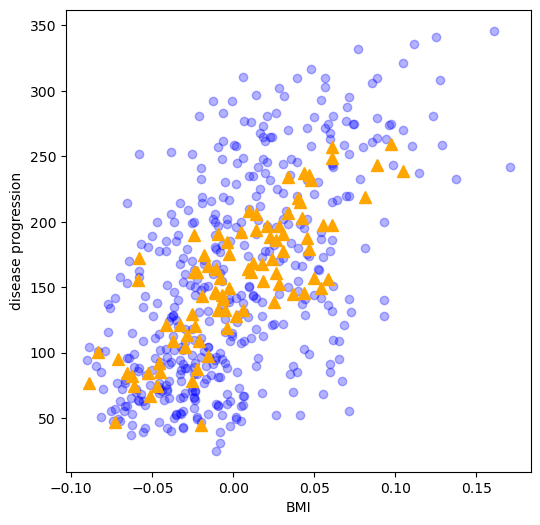

In [25]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['bmi'].values, y.values, 'ob', alpha=0.3)
plt.plot(X_test['bmi'].values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

## Validación Cruzada
Se aplica para asegurarnos de que el modelo no tenga sesgos por la partición de los datasets. La validación cruzada consiste en repetir el proceso varias veces, con diferentes particiones, para obtener una estimación más precisa del rendimiento del modelo.

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_regresion_multiple, X, y, cv=5)

# imprimir los scores de cada fold
print('Scores de cada fold:', scores)

# imprimir el promedio de los scores
print('Score promedio:', scores.mean())

Scores de cada fold: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Score promedio: 0.48231643590864215


# Implementación multivariable

In [35]:
X = df
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [36]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 6

polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
polyreg_scaled.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [41]:
y_pred = polyreg_scaled.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Imprimir el MSE

print('Error cuadratico medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadratico medio (MSE): 61972.59
r2: -11.09


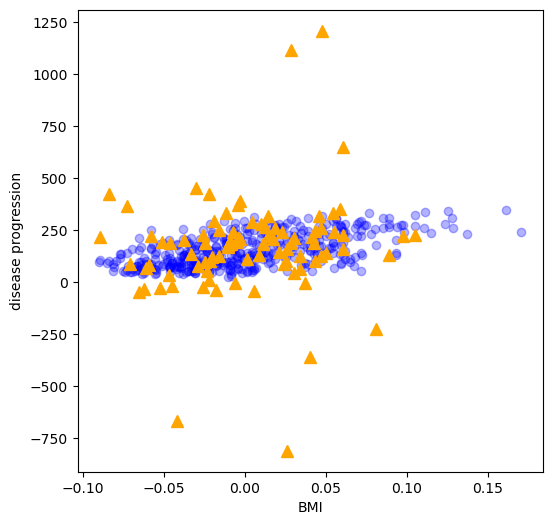

In [43]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['bmi'].values, y.values, 'ob', alpha=0.3)
plt.plot(X_test['bmi'].values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

In [44]:
# alidación cruzada

scores = cross_val_score(modelo_regresion_multiple, X, y, cv=5)

# imprimir los scores de cada fold
print('Scores de cada fold:', scores)

# imprimir el promedio de los scores
print('Score promedio:', scores.mean())

Scores de cada fold: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Score promedio: 0.48231643590864215
